# Neural networks in Keras/Tensorflow

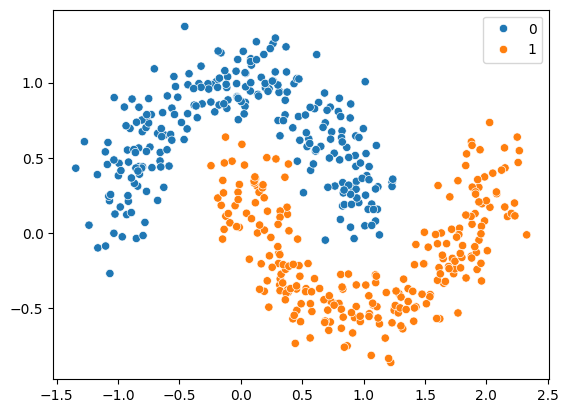

((500, 2), (500,))

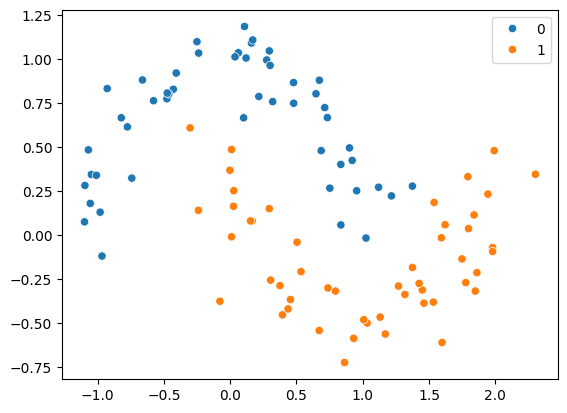

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_moons
from IPython.display import Image

X_tr, y_tr = make_moons(500, random_state=42, noise=0.15)
X_te, y_te = make_moons(100, random_state=43, noise=0.15)

sns.scatterplot(x=X_tr[:, 0], y=X_tr[:, 1], hue=y_tr)
plt.show()
sns.scatterplot(x=X_te[:, 0], y=X_te[:, 1], hue=y_te)

X_tr.shape, y_tr.shape

### Build the model

- We start with an input layer that accepts $28 \times 28$ inputs (MNIST), (2,) for `moons`
- Then apply a dense layer
- Apply an activation function
- A dense layer again
- And a sigmoid activation to predict probabilities

### Compile the model

The model has to be compiled, where we can specify
- the loss function
- the additional metrics to monitor
- the optimizer

### Train the model

We have to fit the model where we can specify 

- a train set with labels
- batch size
- number of epochs
- ratio for the validation set that can used for hyperparameter selection

### Evaluate the model

- evaluate the model on the test set
- make predictions on the test set

In [3]:
# pip install keras
# pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras.optimizers import SGD
from keras.utils import plot_model

model = Sequential()



## Hello World again!

We have built dense neural networks for the MNIST classification problem, where
- we can use dropout layers for regularization
- we can use L1/L2 regularization 
- we can use different sizes, different activation functions, etc.

In [4]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
# Let's look at some examples



## Dense network architecture for MNIST

Let's create a dense network with Sequential model building in Keras with the following layers:

- Input layer of size $(28, 28)$
- Flatten it to the size of $(784, )$
- Dense layer with $256$ neurons
- Activation with `ReLU` 
- Dense layer with $10$ neurons
- Activation with `softmax`

We have to **compile** the model with

- specifying the loss function (`categorical_crossentropy`)
- specifying the metrics to monitor (besides the default loss we would like to monitor `accuracy`)
- specifying the optimizer (`SGD` with a given learning rate)

In [6]:
from keras.regularizers import L2
from keras.optimizers import SGD, Adam, RMSprop, AdamW
from keras.layers import Input, Dense, Flatten, Activation, Reshape, Dropout
from keras.models import Sequential
from keras.utils import to_categorical, plot_model, set_random_seed

model = Sequential()



### Regularization attempt - Kernel regularizers, Dropout

- We can experiment with kernel_regularizers and/or Dropout layers of different values

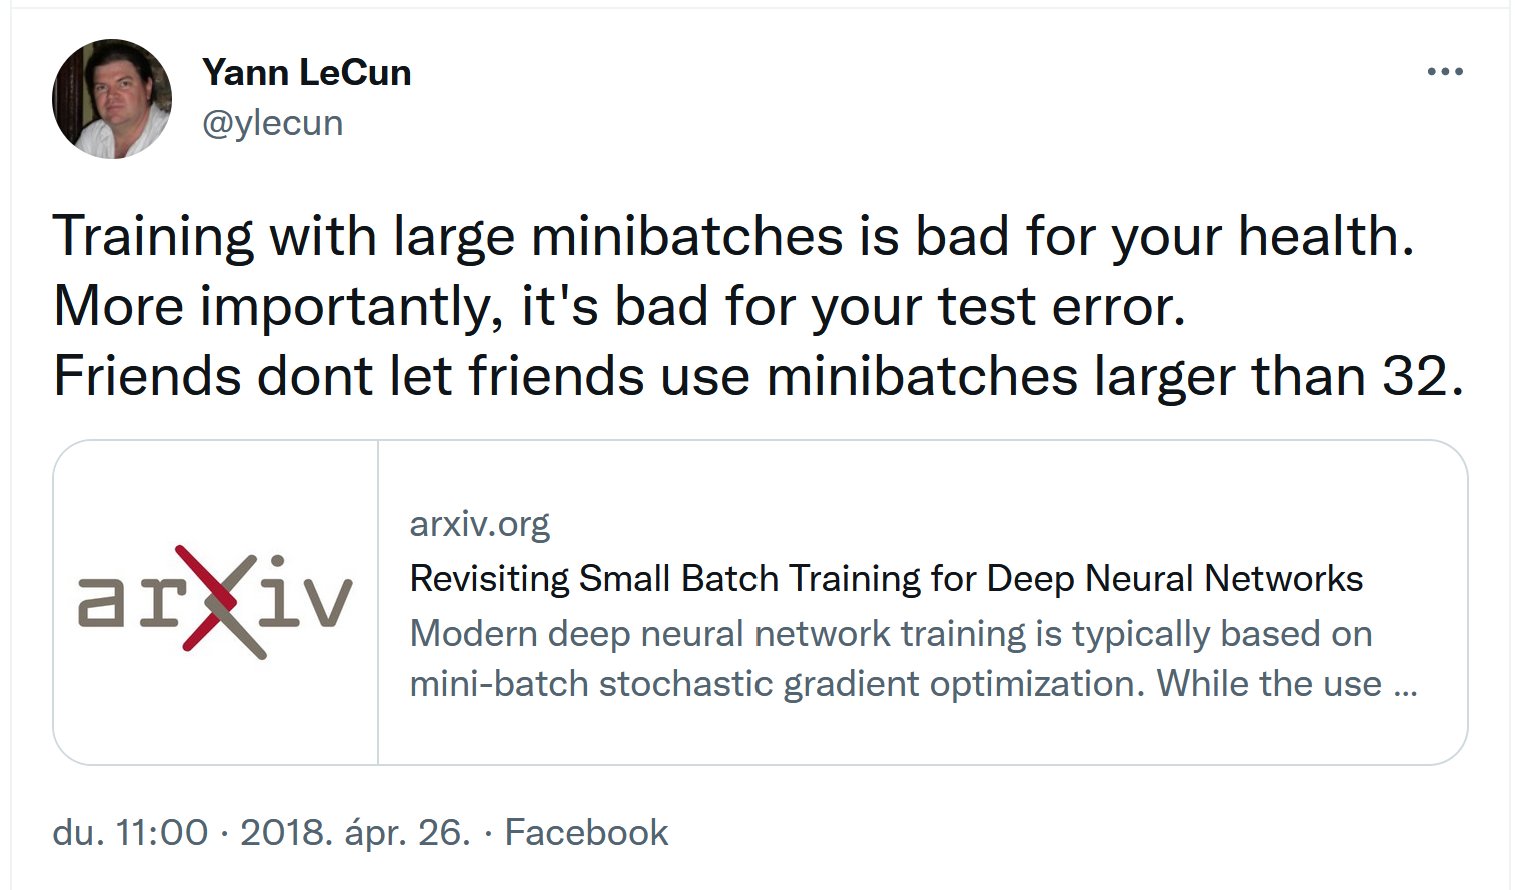

In [7]:
from IPython.display import Image
Image(filename='minibatch.png') 
# Source: Yann LeCun at Twitter - https://twitter.com/ylecun/status/989610208497360896

## Tensorboard monitoring

If we have trained a lots of models, we can post-process them later by looking at a TensorBoard visualization based on saved log files. We can specify the `tensorboard` as a `callback` option as `callbacks=[tensorboard]` during the training phase.

In [8]:
#import tensorboard
from keras.callbacks import TensorBoard
from datetime import datetime

tensorboard = TensorBoard(log_dir="logs/{}".format(datetime.now().strftime('%Y_%m_%d_%H%M%S')))

Then we can load the data with some magic commands

In [9]:
# You might need to delete the garbage from AppData/Local/Temp/.tensorboard-info for a fresh start and/or reload it again
#%reload_ext tensorboard

#%load_ext tensorboard
#%tensorboard --logdir logs/2024_10_01_014315/

Looking at those loss/accuracy curves we can have a better idea what to change:
- if the curves reach a plateau: reduce the learning rate a bit
- if there is still room for improvement, increase the number of epochs or increase the learning rate a bit
- if the curves heavily oscillate: reduce the learning rate a lot

With careful parameter tuning we can squeeze out a slightly better accuracy, but the $99\%$ accuracy is hard to beat with Dense layers.

## Breaking the $99\%$ accuracy barrier - Convolutional Neural Networks (CNNs)

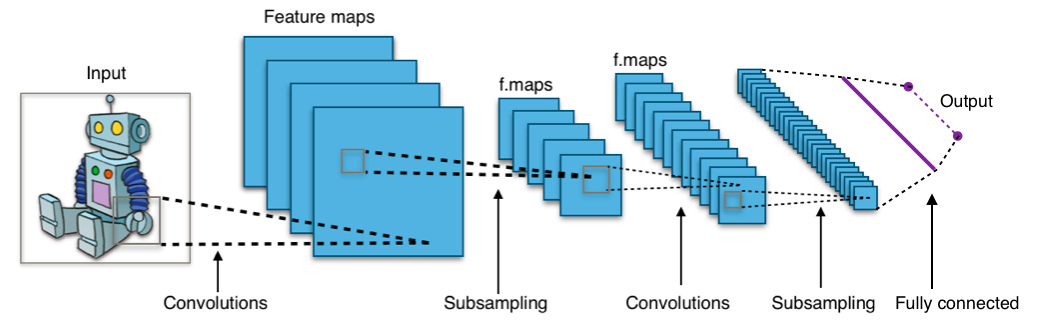

In [10]:
Image(filename='Typical_cnn.png') 
# Source: https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Typical_cnn.png 
# License: CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0/

Convolutional Neural Networks (CNNs) use locally receptive fields, i.e. they look at small (sliding) windows and extract features from only those neurons from the window to the next layer (with the same activation functions as we used before). The weights (coefficients) in those windows remain the same while we slide the window through the image, thus the number of free parameters in these layers is extremely small compared to Dense layers.


Let's see it in action!

In [11]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D

model = Sequential()

### How can we calculate the number of free parameters?
### How did we get the output shape of the CNN layers?

- if we use `padding=same`, the output shape remains the same (it basically fills the outside of the boundary with zeros)

## Pooling layers

Pooling layers can reduce the size of previous layers by using a sliding window (of `pool_size`) with a `stride` step and extracting just one value from every single window

- Max pooling: calculates the largest entry in a sliding window 
- Average pooling: calculates the average of the entries in a sliding window

The image below illustrates the pooling with a kernel size of $2\times2$ with `stride=2`

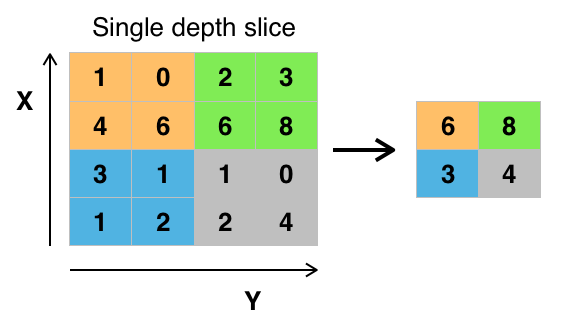

In [12]:
Image(filename='Max_pooling.png') 
# Source: https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Max_pooling.png
# License: CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0/

## Let's try to re-create one of the first CNN architectures ever: LeNet (1989)

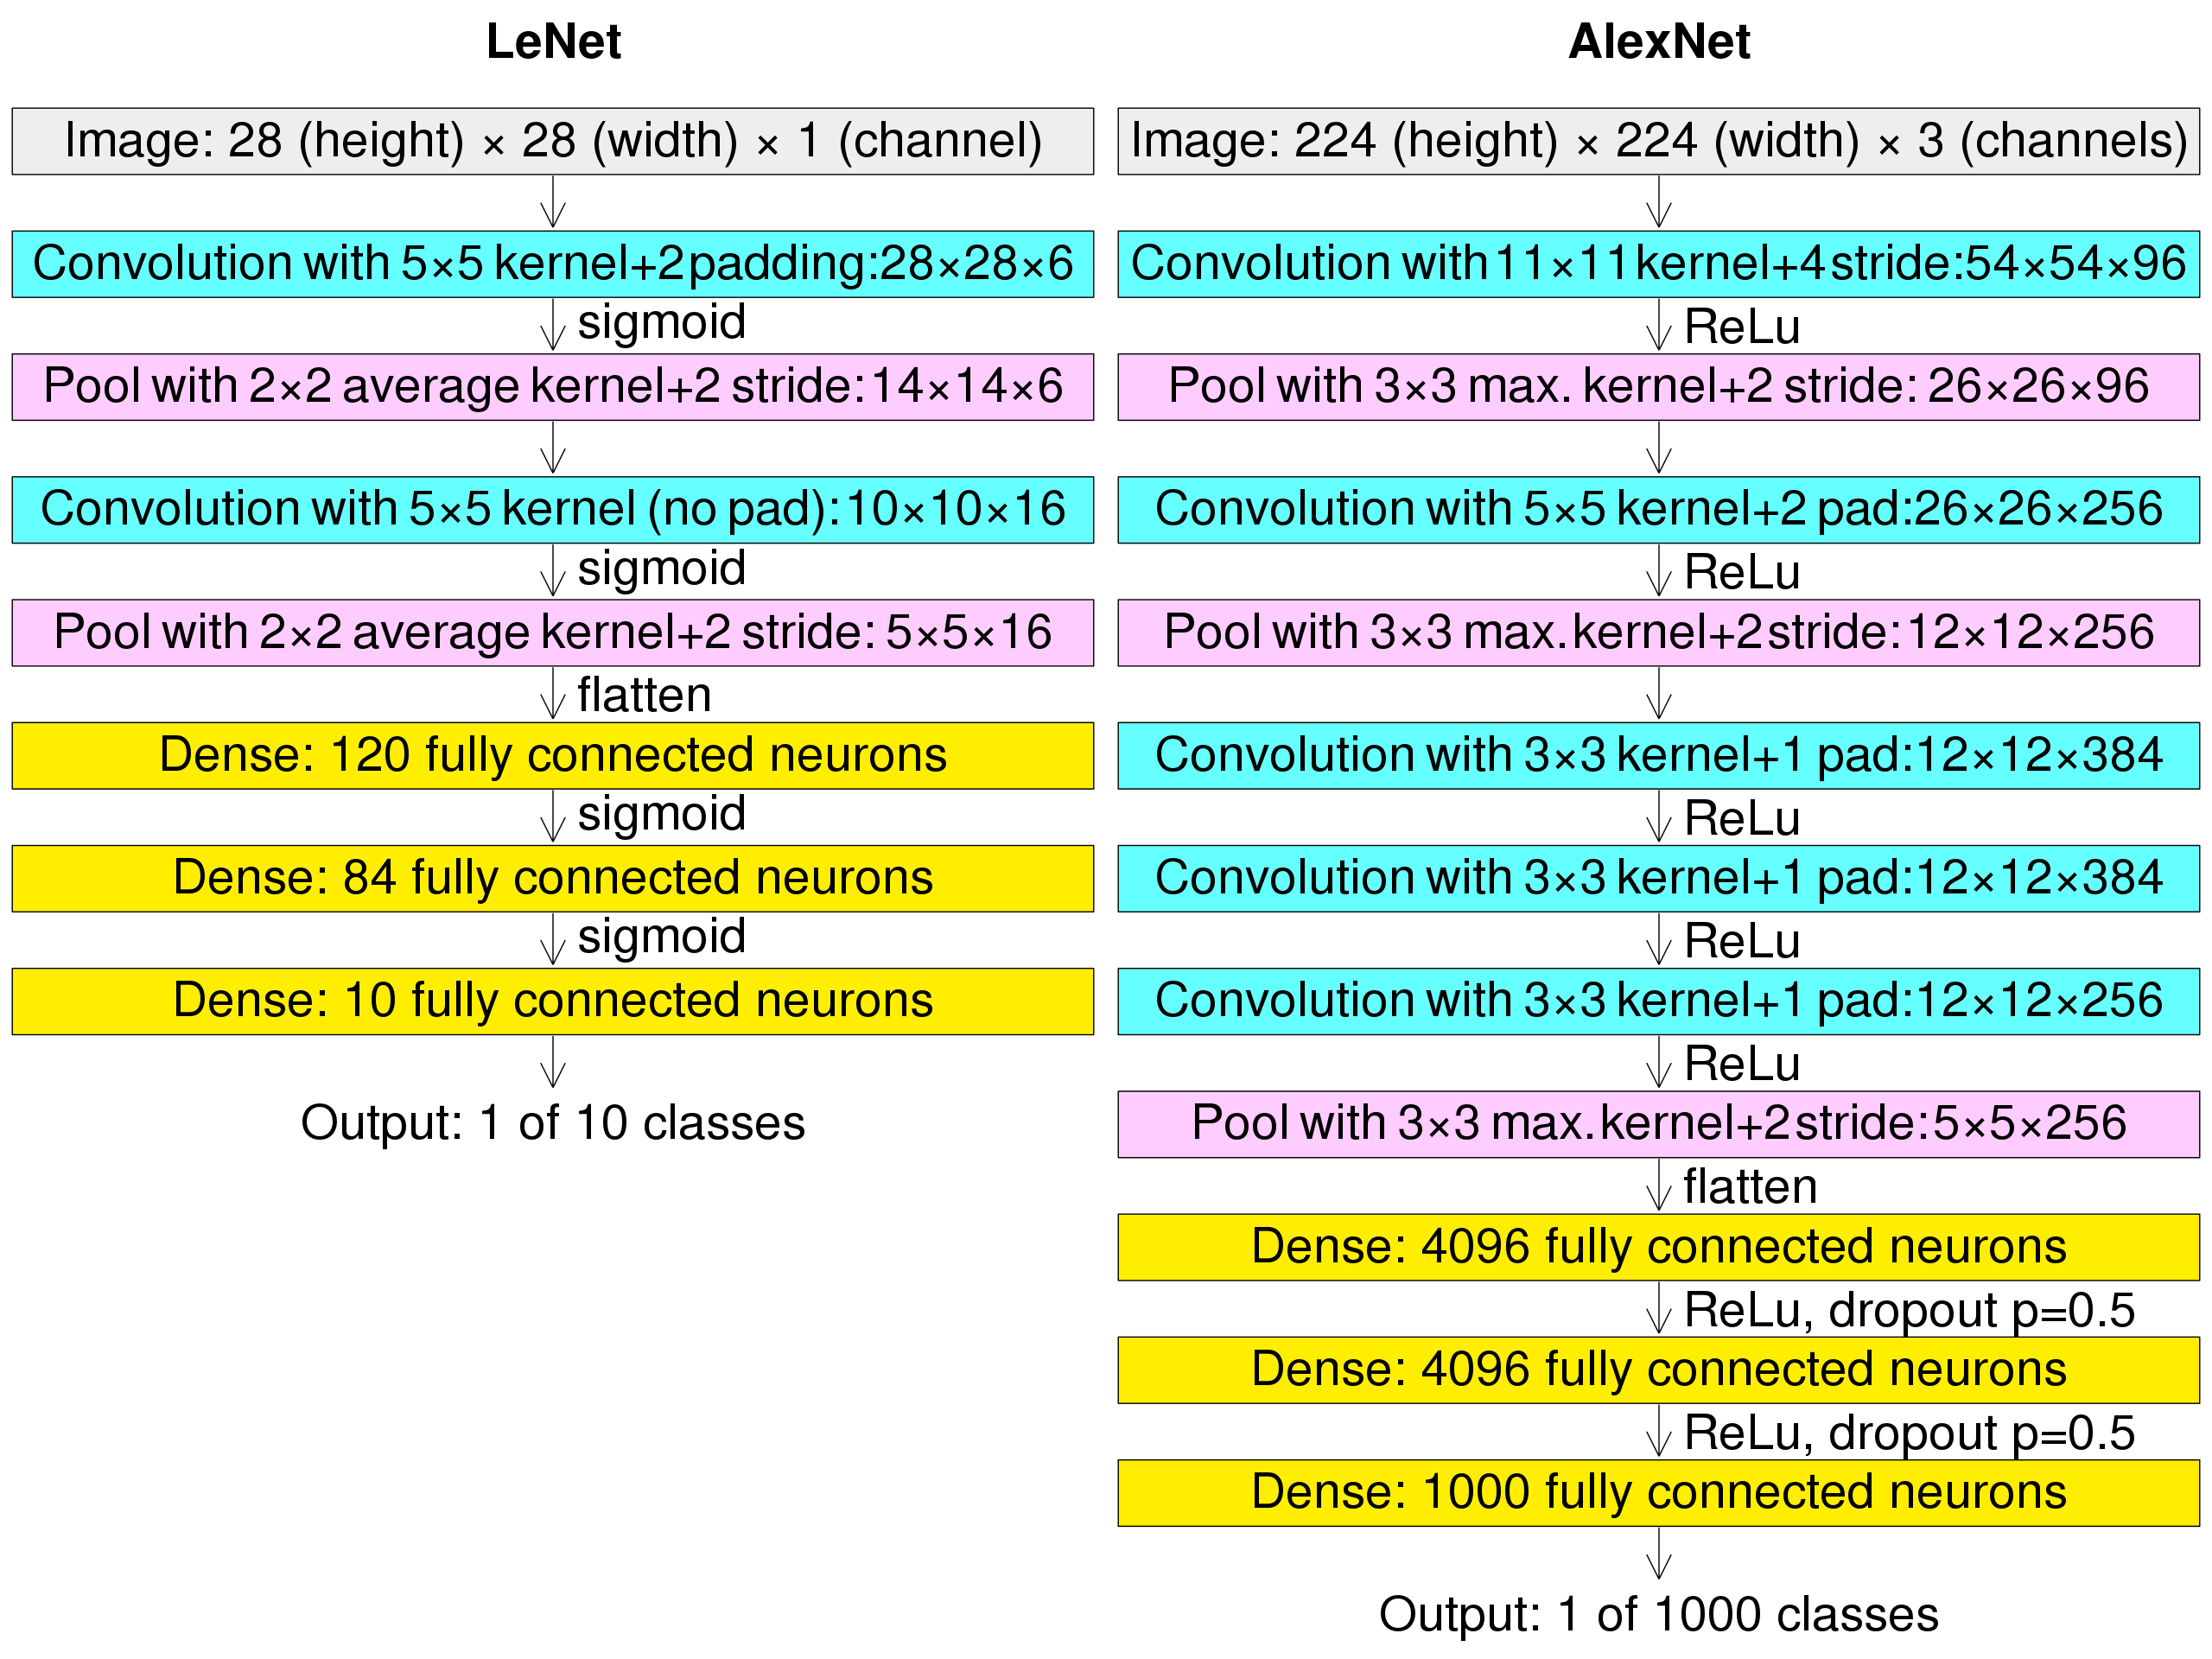

In [13]:
Image(filename='LeNets.png') 
# Source: https://en.wikipedia.org/wiki/LeNet#/media/File:Comparison_image_neural_networks.svg
# License: CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0/

## LeNet in Keras

In [14]:
model = Sequential()


After a few epochs we can see that model doesn't learn too much. If we ask the typical questions, after some experimentations we can find the easiest answer: **change the optimizer**. Looking at the Keras manual we can see that:

- **ADAM** (Adaptive Moment Estimation):  According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

### We have re-created history, but now let's apply some tricks that we have learned since then

- change the `sigmoid` activations to `relu`
- apply `max pooling` instead of `average pooling`
- apply `Dropout` layers between the large Dense layers

### Let's look at the misclassified digits

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#conf_matrix = confusion_matrix(y_test, y_pred_te_class)
#conf_matrix_df = pd.DataFrame(conf_matrix, index=range(10), columns=range(10))
#plt.figure(figsize=(15, 10))
#sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="jet")

## MNIST is boring now, let's play with another dataset: CIFAR-10

The CIFAR-10 dataset consists of 

- $60000$ $32x32$ colour images (RGB) in $10$ classes, with $6000$ images per class
- $50000$ training images
- $10000$ test images
- The classes:
 - airplane
 - automobile
 - bird
 - cat
 - deer
 - dog
 - frog
 - horse
 - ship
 - truck

In [16]:
#from tensorflow.keras.datasets import cifar10
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Further interesting reading material from Andrej Karpathy (2014), former Director of AI at Tesla

http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/

http://karpathy.github.io/2014/09/02/what-i-learned-from-competing-against-a-convnet-on-imagenet/

Let's train a simple CNN model on CIFAR-10

- Input shape is 32×32×3
- Use 32 filters with kernel size 5×5
- `relu` activation and `same` padding
- MaxPooling with 2×2 pool size
- Flatten
- Dense layer with 128 neurons, `relu` activation
- Dense layer with 10 neurons, `softmax` activation
- Use some Dropout layers inbetween the dense layers
- Let's experiment with the different optimizers, SGD, Adam, RMSprop 